In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 100 trials on same set of 2 frames (sensor noise re-applied for each trial)
# Ground truth = [0.5, 0., 0., 0.0, 0.0, 0.1]
fn1 = "MC_results/s1_spherical_ICET_estimates.npy" 
fn2 = "MC_results/s1_spherical_ICET_pred_stds.npy"

# fn1 = "MC_results/s2_spherical_ICET_estimates_no_trees_with_rotation.npy" 
# fn2 = "MC_results/s2_spherical_ICET_pred_stds_no_trees_with_rotation.npy"

est = np.load(fn1)
pred_stds = np.load(fn2)

print(np.mean(pred_stds, axis = 0)[:3])
print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))

# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

[0.00179338 0.00020526 0.00012556]
[0.00202566 0.00176009 0.00109857]


In [3]:
#calc mean and std
mean = np.mean(est, axis = 0)
std = np.std(est, axis = 0)

print(mean)
print(std[:3])
print(np.rad2deg(std[3:]))

[-5.01104752e-01 -1.31759372e-04 -5.76142438e-05  4.64363280e-06
  2.50676512e-05 -9.99985662e-02]
[0.00210681 0.0002617  0.00011828]
[0.00196316 0.00172678 0.00110991]


In [4]:
#test - why does cov[0,0] give different results than std?????
#  answer: https://stackoverflow.com/questions/51923846/why-correlation-computed-by-nump-cov-and-np-std-is-different-from-the-result
# C = np.cov(est[:,0],est[:,1], ddof = 0) #need to include ddof arg
C = np.cov(est.T, ddof = 0) #need to include ddof arg
print(np.sqrt(abs(C)))

[[2.10680890e-03 6.27288063e-04 2.23612424e-05 5.36261049e-05
  5.75751343e-05 3.02715414e-05]
 [6.27288063e-04 2.61698970e-04 6.97642712e-05 3.34985040e-05
  1.86858160e-05 1.42138840e-05]
 [2.23612424e-05 6.97642712e-05 1.18280401e-04 1.74853437e-05
  1.80373831e-05 1.47248693e-05]
 [5.36261049e-05 3.34985040e-05 1.74853437e-05 3.42635735e-05
  8.86463461e-07 7.75656069e-06]
 [5.75751343e-05 1.86858160e-05 1.80373831e-05 8.86463461e-07
  3.01380137e-05 4.17262252e-06]
 [3.02715414e-05 1.42138840e-05 1.47248693e-05 7.75656069e-06
  4.17262252e-06 1.93715878e-05]]


In [5]:
#40 frame trajectory (3 iterations each pair)
# Ground truth = [0.5, 0., 0., 0.0, 0.0, 0.05]

# fn1 = "MC_results/traj1_cart_ICET_estimates_with_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_with_GP.npy"
fn1 = "MC_results/traj1_cart_ICET_estimates_no_GP.npy" 
fn2 = "MC_results/traj1_cart_ICET_pred_stds_no_GP.npy"
# fn1 = "MC_results/traj1_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj1_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_cart_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_cart_ICET_pred_stds.npy"
est = np.load(fn1)
pred_stds = np.load(fn2)

#just consider first 100----------------------
est = est[:100,:]
pred_stds = pred_stds[:100,:]
#---------------------------------------------

#remove outliers ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
before = np.shape(est)[0]
#get rid of high translation errors
good = np.where(est[:,0] > 0.35) #0.35
est = est[good]
pred_stds = pred_stds[good]
good = np.where(est[:,0] < 0.65) #0.35
est = est[good]
pred_stds = pred_stds[good]
#get rid of high rotation errors
good = np.where(abs(est[:,5] < 0.08  ))
est = est[good]
pred_stds = pred_stds[good]
print("removed ", before - np.shape(est)[0], "outliers from ", before, "total estimates \n")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print(est[:,0])
print("Predicted STDs: \n",
    np.mean(pred_stds, axis = 0)[:3], np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))
# print(np.mean(pred_stds, axis = 0)[:3],np.mean(pred_stds, axis = 0)[3:])

removed  32 outliers from  100 total estimates 

[0.50197417 0.49763441 0.50001436 0.49945042 0.4972041  0.5017457
 0.50356972 0.50474083 0.49995378 0.4250567  0.41743544 0.42048144
 0.51755869 0.51124734 0.51281488 0.49711615 0.4980697  0.49625793
 0.49273846 0.50093001 0.49571502 0.4967477  0.5460602  0.50275809
 0.51066178 0.51926738 0.39265305 0.38146251 0.39128676 0.47927338
 0.49818766 0.49171585 0.49178788 0.50795603 0.50400442 0.50657994
 0.58632571 0.58569109 0.57340395 0.63825703 0.6356883  0.64522058
 0.64193726 0.64432549 0.6000495  0.60895497 0.61778033 0.49878836
 0.50099117 0.49838334 0.4982107  0.49816418 0.49608836 0.49960452
 0.50187653 0.495208   0.52270603 0.55979627 0.56500828 0.53975958
 0.50884098 0.5200268  0.51324344 0.51154494 0.49072129 0.48999125
 0.48936442 0.49885938]
Predicted STDs: 
 [0.00319985 0.00025465 0.00224451] [0.01023658 0.01308617 0.00116121]


In [6]:
#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean)
std = np.std(est, axis = 0)

print(std[:3], np.rad2deg(std[3:]))
# print(std[:3], std[3:])

[0.05589685 0.00174533 0.00452276] [0.02622921 0.07860507 0.00923957]


In [7]:
#test removing points too close to the center from scan2 in cartesian ICET
#   DEBUGGING GROUND PLANE NEAR EGO-VEHICLE

t = np.linspace(0,11,12)
t = t.reshape([4,3])
print(t, "\n")

# print(t[t<3])
dist = np.sum(t**2, axis = 1)
print(t[dist < 100])

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]] 

[[0. 1. 2.]
 [3. 4. 5.]]


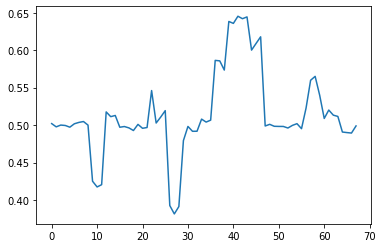

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(est[:,0])

In [9]:
print(np.linspace(0,10,11))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [10]:
print(4%3)

1


<IPython.core.display.Javascript object>


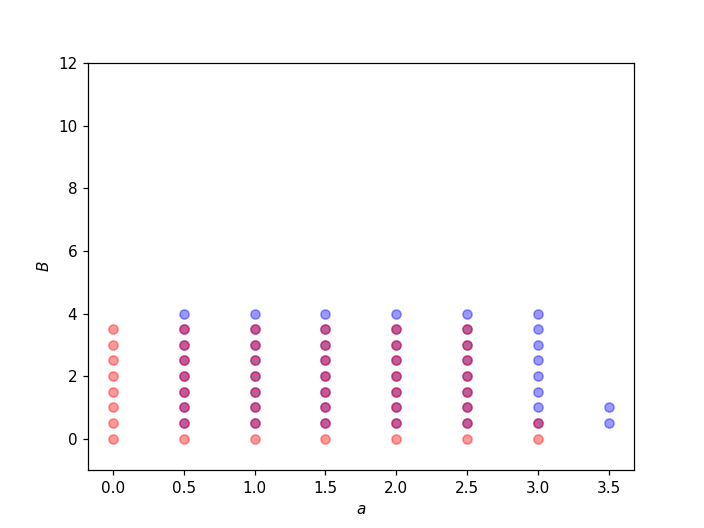

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#test indexing for spherical paper
npts = 50
x = np.linspace(0, npts-1, npts)
# x = np.linspace(1, npts, npts)
# print(x)
fig, ax = plt.subplots()
ax.set_ylim([-1,12])
ax.set_xlabel('$a$')
ax.set_ylabel('$B$')

ang_min = 0
ang_max = 4
deltaA = 0.5
deltaB = 0.5

for n in x:
    #horizontal angle (drawn left/ right here)
    num_vert_bins = (ang_max-ang_min)/deltaB #- 1
    a_min = (np.floor(n/num_vert_bins))*(deltaA)
    a_max = (1 + np.floor(n/num_vert_bins))*(deltaA)
    
    #elevation angle
    b_min = deltaB*(n%num_vert_bins)
    b_max = deltaB*(n%num_vert_bins + 1)

    ax.scatter(a_min, b_min, c = 'red', alpha = 0.4)
    ax.scatter(a_max, b_max, c = 'blue', alpha = 0.4)

    # print(int(num_vert_bins), "vertical bins")
